<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/image_processing/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering in the spatial domain

## Convolution

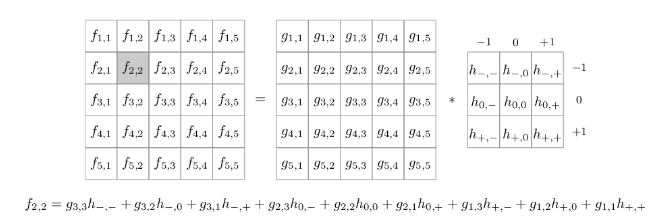

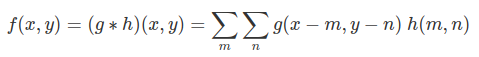

### Prepare Colab, import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#! ls
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls
#! git pull

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  evaluation   models	    prepare_data    README.md
docs		  experiments  poetry.lock  pyproject.toml  requirements.txt


In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from data_exploration.display_images import display 
import cv2 as cv
import tensorflow as tf
from skimage import color
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

In [4]:
total_tiles = 11121
train_tiles = 6672
test_val_tiles = 2224
data_path = "../data_colab/256_256"

In [5]:
mask  = np.load(os.path.join(data_path,'2022_06_20.npz'))['y_mask']
input  = np.load(os.path.join(data_path,'2022_06_20.npz'))['x_input']

print(mask.shape)
print(input.shape)

(761, 256, 256)
(761, 256, 256, 5)


In [6]:
selected_input = [input[19], input[26], input[27], input[31], input[32], input[36], input[37]]
selected_mask = [mask[19], mask[26], mask[27], mask[31], mask[32], mask[36], mask[37]]

### Applied convolution for vertical edge detection

[[10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]]


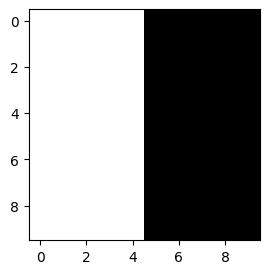

In [64]:
image_size = 10
img = np.zeros((image_size,image_size))
img[:,:(image_size//2)] = 10
img[:,(image_size//2):] = 0
print(img)
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]



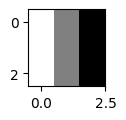

In [62]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print(kernel)
print()
plt.figure(figsize=(1,1))
plt.imshow(kernel, cmap='gray')
plt.show()

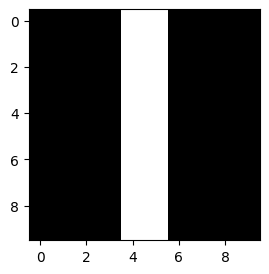

In [65]:
result = cv.filter2D(img, -1, kernel)
plt.figure(figsize=(3,3))
plt.imshow(result, cmap='gray')
plt.show()

### Horizontal Edge Detection Filter
=> more precise the bigger the image size

[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


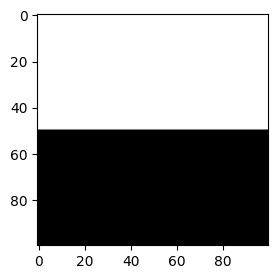

In [66]:
image_size = 100
img = np.zeros((image_size,image_size))
img[:(image_size//2),:] = 10
print(img)
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]



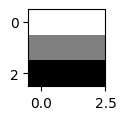

In [67]:
kernel = np.array([[1,1, 1],[0, 0,0],[-1,-1,-1]])
print(kernel)
print()
plt.figure(figsize=(1,1))
plt.imshow(kernel, cmap='gray')
plt.show()

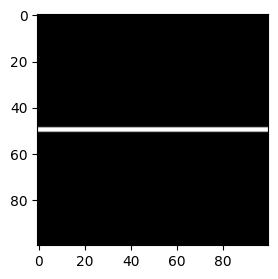

In [72]:
result = cv.filter2D(img, -1, kernel)
plt.figure(figsize=(3,3))
plt.imshow(result, cmap='gray')
plt.show()

### Bluring using a box filter (averaging)
- convolution with a kernel where all values are the same
- the bigger the size of the kernel the bigger the smoothing effect
- kernel needs to be normalized (sum =1) otherwise unwanted darkening or brightness effects may occure

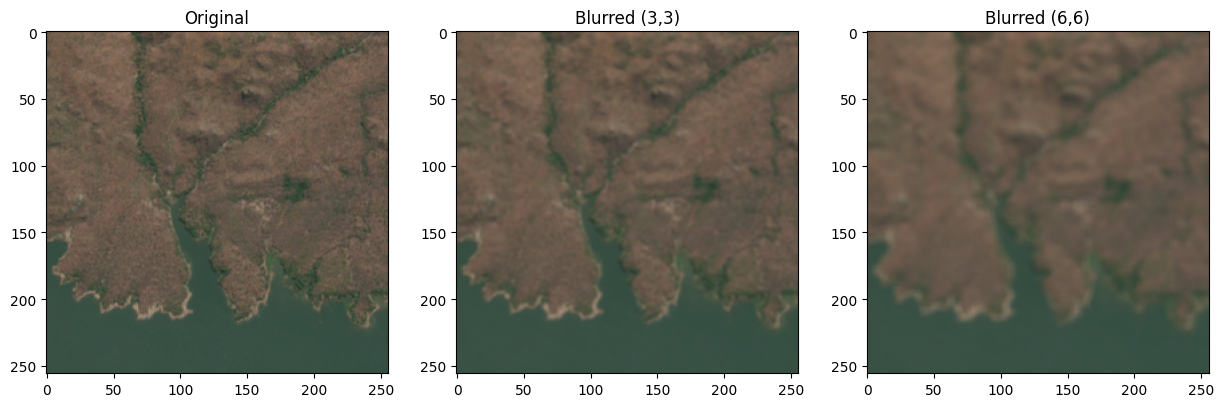

In [110]:
kernel = np.ones((3,3),np.float32)/9
kernel2 = np.ones((6,6),np.float32)/36

img = np.array(input[0][:,:,:3], np.uint8)
blured = cv.filter2D(img,-1,kernel)
blured2 = cv.filter2D(img,-1,kernel2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(blured)
axs[1].set_title('Blurred (3,3)')
axs[2].imshow(blured2)
axs[2].set_title('Blurred (6,6)')
plt.show()

### Gaussian Filter

<img src="https://miro.medium.com/v2/resize:fit:376/0*Qyt87iKttnjvkxz8" >

<img src="https://miro.medium.com/v2/resize:fit:640/0*43h6WCpBGxHwdWoa" >

- very effective in removing noise
- convolution where the kernel is the gaussian function applied on a matrix 
- the bigger the standard deviation the smaller the smoothing effect as neighbouring pixels have a bigger influence
- the bigger the kernel size the bigger the smooting effect

(256, 256, 3)


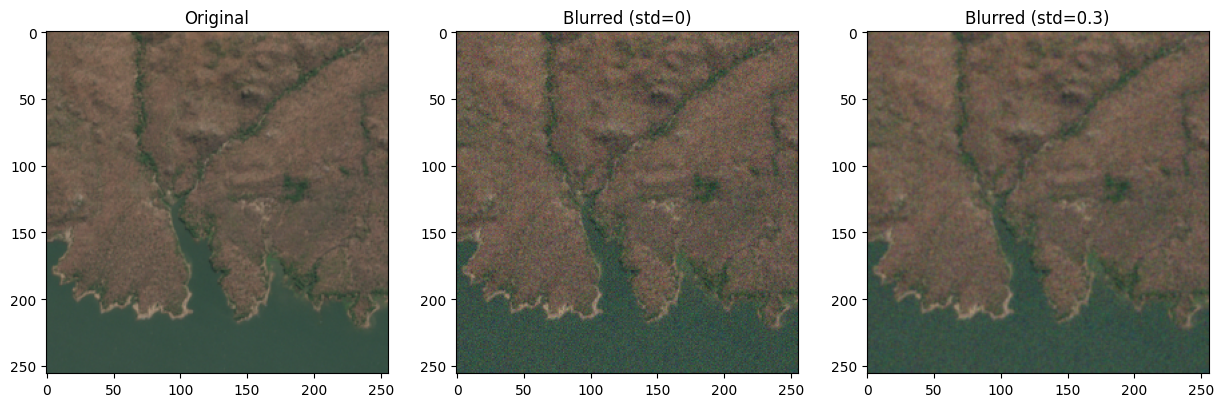

In [36]:
img = np.array(input[0][:,:,:3], np.uint8)

mean = 0
stddev = 10

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, stddev, img.shape).astype(np.int16)

# Add noise to the img
noisy_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

print(noisy_img.shape)

blured = cv.GaussianBlur(noisy_img,(3,3),0.6)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(noisy_img)
axs[1].set_title('Blurred (std=0)')
axs[2].imshow(blured)
axs[2].set_title('Blurred (std=0.3)')
plt.show()

### Laplacian filter
- does not work with images that contain noise, therefore often applied together with gaussian smoothing

In [53]:
img = np.array(input[19][:,:,:3], np.uint8)
# Convert the img to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply the Laplacian filter
laplacian = cv.Laplacian(gray)

threshold_value = 20
_, edges = cv.threshold(np.abs(laplacian), threshold_value, 255, cv.THRESH_BINARY)

print(np.max(laplacian))

print(np.min(laplacian))
# Convert the Laplacian result back to uint8
laplacian = np.uint8(np.absolute(laplacian))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Laplacian filter')
plt.show()

error: ignored

## Median Filter

- non-linear
- used for noise reduction ('salt and pepper noise') while preserving edges and fine details
- replaces each pixel with the median value of it's neighboring pixels

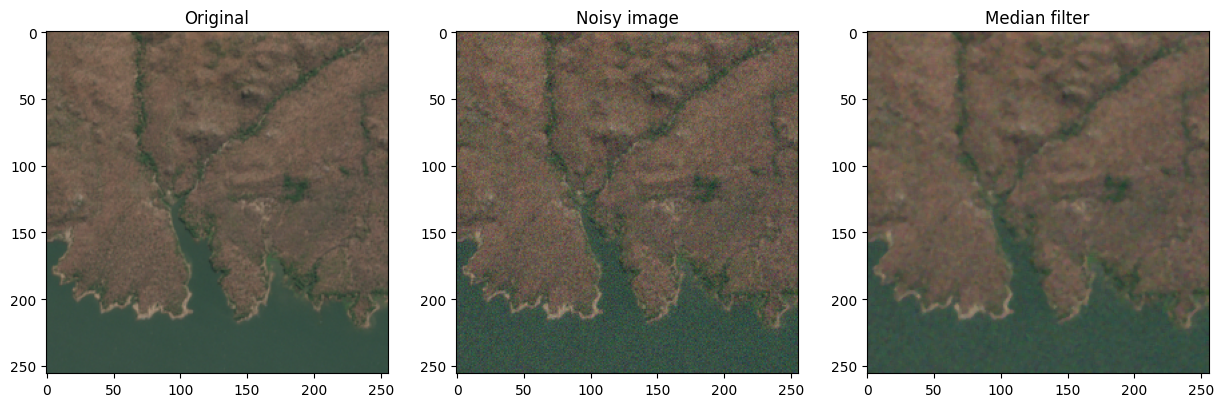

In [32]:
img = np.array(input[0][:,:,:3], np.uint8)

mean = 0
stddev = 10

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, stddev, img.shape).astype(np.int16)

# Add noise to the img
noisy_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

blured = cv.medianBlur(noisy_img, 3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(noisy_img)
axs[1].set_title('Noisy image')
axs[2].imshow(blured)
axs[2].set_title('Median filter')
plt.show()